The given normalized schrodinger equation is, $$ \frac{\partial \tilde{\psi}}{\partial s} = -i \left[ -\frac{\partial^2 \tilde{\psi}}{\partial q^2} + \tilde{V} \tilde{\psi} \right]$$
by Crank Nicolson method, $$ F \Psi^{n+1} = G \Psi^{n} $$
where $$F = \frac{I}{\Delta s} + \frac{i}{2} ( - D + P ) $$
$$G = \frac{I}{\Delta s} - \frac{i}{2} ( - D + P ) $$
and $$ \frac{\partial^2}{\partial q^2} = D = \frac{1}{\Delta q^2} \begin{bmatrix} -2 & 1 & 0 & 0 & ... \\ 1 & -2 & 1 & 0 & ... \\ \vdots & & & & \\ \vdots & & & & \\ ... & 0 & 0 & 1 & -2 \end{bmatrix} $$
$$ \tilde{V} = P = \begin{bmatrix} V(q_1) & 0 & 0 & 0 & ... \\ 0 & V(q_2) & 0 & 0 & ... \\ \vdots & & & & \\ \vdots & & & & \\ ... & 0 & 0 & 0 & V(q_n) \end{bmatrix} $$

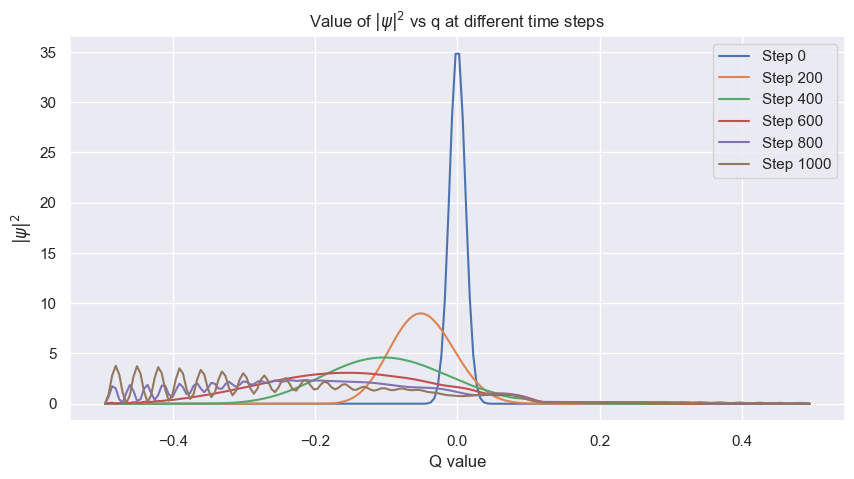

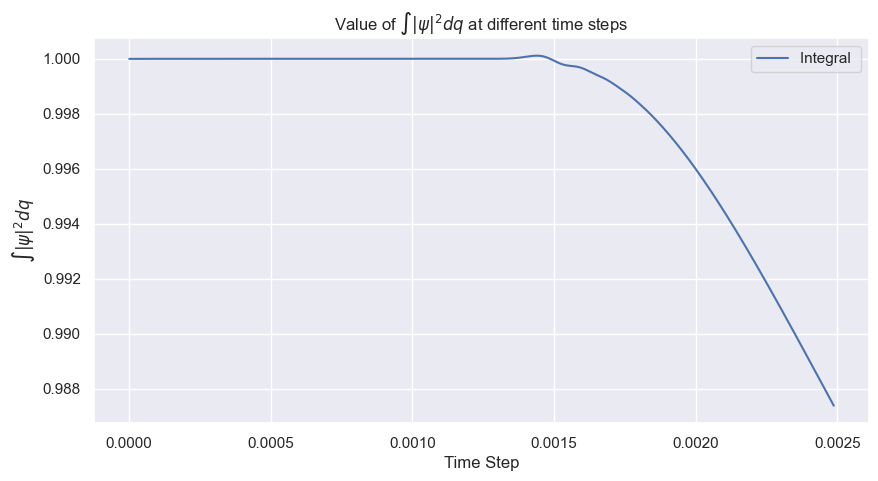

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("Assignment3", exist_ok=True)

# Given Parameters
E = 4500
p0 = 100
N = 200 # number of internal grid points
del_q = 1/201
del_s = del_q / 2000
iota_2 = 1j/2

def simpson(function_psi, q):
    N = len(q)
    h = (q[-1] - q[0]) / (N - 1)
    S = function_psi[0] + function_psi[-1]
    S += 3 * np.sum(function_psi[1:-1:3] + function_psi[2:-1:3])
    S += 2 * np.sum(function_psi[3:-1:3])
    return 3 * h * S / 8


Ep_term = E - (p0**2)/4
q = np.linspace(-1/2 + del_q, 1/2 - del_q, N, dtype=float)
psi_initial = ((2/np.pi)**0.25) * (Ep_term**0.25) * np.exp(-Ep_term * (q**2)) * np.exp(iota_2 * p0 * q)

psi_norm = simpson(np.abs(psi_initial)**2, q)
psi_initial[0] = 0
psi_initial[-1] = 0

mid_diag = np.full(N, 2)
side_diag = np.full(N-1, -1)

D = np.diag(mid_diag, k = 0) + np.diag(side_diag, k = -1) + np.diag(side_diag, k = 1)
D = D / (del_q**2)

mask = np.where(q > 1/8)
V = np.zeros_like(q)
V[mask] = 5000
P = np.diag(V, k = 0)

I = np.eye(N)

F = I + iota_2 * del_s * (- D + P)
G = I - iota_2 * del_s * (- D + P)

psi_storage = [psi_initial]
integral_storage = [psi_norm]
psi = psi_initial
for i in range(1,1001):
    psi_next = np.linalg.solve(F, G @ psi)
    integral = simpson(np.abs(psi_next)**2, q)
    psi_next[0] = 0
    psi_next[-1] = 0
    integral_storage.append(integral)
    if i % 200 == 0:
        psi_storage.append(psi_next)
    psi = psi_next

psi_storage = np.array(psi_storage)
integral_storage = np.array(integral_storage)


plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")

for i, psi in enumerate(psi_storage):
    psi_sqr = np.abs(psi)**2
    sns.lineplot(x= np.real(q), y=psi_sqr, label=f"Step {i*200}")

plt.legend()
plt.title(r"Value of $|\psi|^2$ vs q at different time steps")
plt.xlabel("Q value")
plt.ylabel(r"$|\psi|^2$")
plt.savefig("Assignment3/probability_distribution_function.png")
plt.show()

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")

time_array = np.linspace(0, 1000, 1001)
sns.lineplot(x= time_array*del_s, y=integral_storage, label=f"Integral ")

plt.legend()
plt.title(r"Value of $\int |\psi|^2 dq$ at different time steps ")
plt.xlabel("Time Step")
plt.ylabel(r"$\int |\psi|^2 dq$")
plt.savefig("Assignment3/total_probability.png")
plt.show()


